In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics

In [20]:
#Do all the intro stuff, find when day, cont, session, stem change.
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/chimi_clean_contingencies_only_parsed_data.csv')
df #df is the dataframe containing the entire csv
df['day']= df['date'].ne(df['date'].shift()).cumsum()
df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())
df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
del df['diff_cont']
df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift())
df['day_chng'] = df['day'].ne(df['day'].shift())
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
# df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
df['sess_chng'] = df['session'].ne(df['session'].shift()).cumsum()
df


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,glob_nom_avg,sess_chng
0,0,4,B,1,805020802050,20200213,1,0,1,1,True,True,True,50.0,1
1,1,3,B,1,805020802050,20200213,1,1,1,1,False,False,False,50.0,1
2,2,1,A,1,805020802050,20200213,1,2,1,1,False,False,True,50.0,1
3,3,2,A,0,805020802050,20200213,1,3,1,1,False,False,False,50.0,1
4,4,1,A,1,805020802050,20200213,1,4,1,1,False,False,False,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10110,10110,3,B,0,508050208020,20200228,3,195,16,1,False,False,False,50.0,51
10111,10111,4,B,0,508050208020,20200228,3,196,16,1,False,False,False,50.0,51
10112,10112,3,B,1,508050208020,20200228,3,197,16,1,False,False,False,50.0,51
10113,10113,4,B,0,508050208020,20200228,3,198,16,1,False,False,False,50.0,51


In [21]:
fig, axs = plt.subplots(8,11, figsize=(28, 40), dpi=300, sharex=True, sharey=True, )
for day in range(10,12):
    for session in range(1,9):
        data_group = df[(df['day'] == day) & (df['session'] == session) & (df['cont_num'] == 1)]
        if len(data_group)>0:
            cont = data_group['contingency'].iloc[1]
            date1 = data_group['date'].iloc[1]
            session = data_group['session'].iloc[1]
            axs[session-1,day-1].scatter(data_group['trial'],data_group['leaf'], s=1)
            axs[session-1,day-1].set_title(f'{cont} \ndate: {date1} \nses: {session}').set_fontsize(8)

In [31]:
df2 = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/chimi_clean_contingencies_only_parsed_depletion_data.csv')
df2 #df is the dataframe containing the entire csv
df2['day']= df2['date'].ne(df2['date'].shift()).cumsum()
#df2['diff_cont'] = df2['contingency'].ne(df['contingency'].shift())
#df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
#del df['diff_cont']
#df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift())
df2['day_chng'] = df2['day'].ne(df2['day'].shift())
df2['stem_switch'] = df2['stem'].ne(df2['stem'].shift())
# df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
# for ix in range(len(df2)):
#     cont= str(df2.loc[ix, 'contingency'])
#     cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
#     cont = [int(i) for i in cont]
#     df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
df2['sess_chng'] = df2['session'].ne(df2['session'].shift()).cumsum()
df2


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,day_chng,stem_switch,sess_chng
0,0,1,A,1,805020802050,20200303,1,0,1,True,True,1
1,1,2,A,0,645020802050,20200303,1,1,1,False,False,1
2,2,1,A,1,644020802050,20200303,1,2,1,False,False,1
3,3,2,A,1,514020802050,20200303,1,3,1,False,False,1
4,4,1,A,0,513220802050,20200303,1,4,1,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7309,7309,3,B,0,101006236000,20200313,4,230,11,False,False,31
7310,7310,4,B,0,101005236000,20200313,4,231,11,False,False,31
7311,7311,5,C,1,101020906000,20200313,4,232,11,False,True,31
7312,7312,4,B,1,101020906000,20200313,4,233,11,False,True,31


In [32]:
fig, axs = plt.subplots((df2['session'].max()),(df2['day'].max()), figsize=(28, 40), dpi=300, sharex=True, sharey=True)
for day in range(1,df2['day'].max()+1):
    for session in range(1,df2['session'].max()+1):
        data_group = df2[(df2['day'] == day) & (df2['session'] == session)]
        if len(data_group)>0:
            cont = data_group['contingency'].iloc[1]
            date1 = data_group['date'].iloc[1]
            session = data_group['session'].iloc[1]
            axs[session-1,day-1].scatter(data_group['trial'],data_group['leaf'], s=1)
            axs[session-1,day-1].set_title(f'{cont} \ndate: {date1} \nses: {session}').set_fontsize(8)

In [33]:
obj = ['day', 'session', 'stem']
df2['rew_rate'] = df2.groupby(obj)[['reward']].apply(lambda x: x.ewm(halflife=5).mean())
df2['rolling_avg_A'] =df2[df2['stem']=='A']['rew_rate']
df2['rolling_avg_B'] =df2[df2['stem']=='B']['rew_rate']
df2['rolling_avg_C'] =df2[df2['stem']=='C']['rew_rate']


cols = ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']
# df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_A'] = 0
# df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_C'] = 0
df2.loc[(df2['trial']==0),'rolling_avg_A'] = 0
df2.loc[(df2['trial']==0),'rolling_avg_B'] = 0
df2.loc[(df2['trial']==0),'rolling_avg_C'] = 0

df2.loc[:,cols] = df2.loc[:,cols].ffill()

equal = (df2['rolling_avg_A'] == df2['rolling_avg_B']) | (df2['rolling_avg_B'] == df2['rolling_avg_C']) | (df2['rolling_avg_A'] == df2['rolling_avg_C'])
df2['best_stem'] = df2.loc[~equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)

df2['best_stem2'] = df2.loc[equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)
df2
replace_index = df2.loc[(df2['best_stem2'] =='rolling_avg_A')].index
df2.loc[replace_index,'best_stem2'] = 'A'
replace_index = df2.loc[(df2['best_stem2'] =='rolling_avg_B')].index
df2.loc[replace_index,'best_stem2'] = 'B'
replace_index = df2.loc[(df2['best_stem2'] =='rolling_avg_C')].index
df2.loc[replace_index,'best_stem2'] = 'C'

replace_index = df2.loc[(df2['best_stem'] =='rolling_avg_A')].index
df2.loc[replace_index,'best_stem'] = 'A'
replace_index = df2.loc[(df2['best_stem'] =='rolling_avg_B')].index
df2.loc[replace_index,'best_stem'] = 'B'
replace_index = df2.loc[(df2['best_stem'] =='rolling_avg_C')].index
df2.loc[replace_index,'best_stem'] = 'C'

df2['at_best'] = np.where( df2['stem'] == df2['best_stem'] , '1', '0')
df2['at_best2'] = np.where( df2['stem'] == df2['best_stem2'] , '1', '0')
df2['best_all'] = df2['at_best'] +df2['at_best2']
# del df['at_best']
# del df['at_best2']
Not_at_Best = df2[df2['best_all']=='00']
at_best = df2[df2['best_all']=='01'] 
at_best2 = df2[df2['best_all']=='10']

df2.loc[(df2['best_all'] =='01'),'best_all']= 1
df2.loc[(df2['best_all'] =='10'),'best_all']= 1
df2.loc[(df2['best_all'] =='00'),'best_all']= 0

del df2['at_best']
del df2['at_best2']



In [34]:
df2

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,day_chng,stem_switch,sess_chng,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C,best_stem,best_stem2,best_all
0,0,1,A,1,805020802050,20200303,1,0,1,True,True,1,1.000000,0.000000,0.000000,0.000000,NaN,A,1
1,1,2,A,0,645020802050,20200303,1,1,1,False,False,1,0.465398,0.465398,0.000000,0.000000,NaN,A,1
2,2,1,A,1,644020802050,20200303,1,2,1,False,False,1,0.668792,0.668792,0.000000,0.000000,NaN,A,1
3,3,2,A,1,514020802050,20200303,1,3,1,False,False,1,0.769519,0.769519,0.000000,0.000000,NaN,A,1
4,4,1,A,0,513220802050,20200303,1,4,1,False,False,1,0.570292,0.570292,0.000000,0.000000,NaN,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7309,7309,3,B,0,101006236000,20200313,4,230,11,False,False,31,0.277509,0.000000,0.277509,0.310183,C,NaN,0
7310,7310,4,B,0,101005236000,20200313,4,231,11,False,False,31,0.241586,0.000000,0.241586,0.310183,C,NaN,0
7311,7311,5,C,1,101020906000,20200313,4,232,11,False,True,31,0.399567,0.000000,0.241586,0.399567,C,NaN,1
7312,7312,4,B,1,101020906000,20200313,4,233,11,False,True,31,0.339762,0.000000,0.339762,0.399567,C,NaN,0


In [35]:
same_trial = df2

In [36]:
q1= df2.loc[1:len(df2)/4,'best_all']
q2= df2.loc[len(df2)/4:2*(len(df2)/4),'best_all']
q3 = df2.loc[2*len(df2)/4:3*(len(df2)/4),'best_all']
q4 = df2.loc[3*len(df2)/4:4*(len(df2)/4),'best_all']

Text(0, 0.5, 'avg prop trials at best stem per quarter')

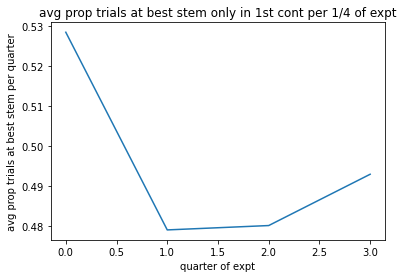

In [37]:
lst = [statistics.mean(q1),statistics.mean(q2),statistics.mean(q3),statistics.mean(q4)]
plt.plot(lst)
plt.title('avg prop trials at best stem only in 1st cont per 1/4 of expt')
plt.xlabel('quarter of expt')
plt.ylabel('avg prop trials at best stem per quarter')

In [38]:

lst_prop_at_best_per_sesh = []
for ix in range(1,(df2['sess_chng'].max())): #for 1:num sessions 
    sesh_data = df2.loc[df2['sess_chng'] == ix]    #makes new df with only 1st cont of session
    #sesh_data = day_data.loc[day_data['session'] == ix]
    if len(sesh_data)>0:
        prop_trials_at_best = statistics.mean(sesh_data['best_all']) #mean num of 1/0 for being at experienced best
    lst_prop_at_best_per_sesh.append(prop_trials_at_best)

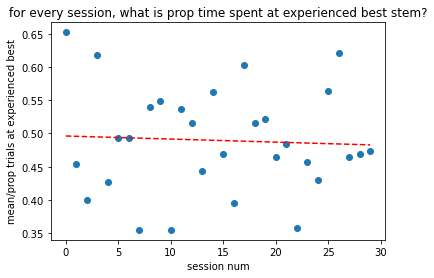

In [39]:
plt.scatter(range(len(lst_prop_at_best_per_sesh)), lst_prop_at_best_per_sesh)
plt.title('for every session, what is prop time spent at experienced best stem?')
plt.xlabel('session num')
plt.ylabel('mean/prop trials at experienced best')
X = np.array(range(len(lst_prop_at_best_per_sesh)))
y = np.array(lst_prop_at_best_per_sesh)
#np.polyfit(np.log(X), y, 1)
z = np.polyfit(X, y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")



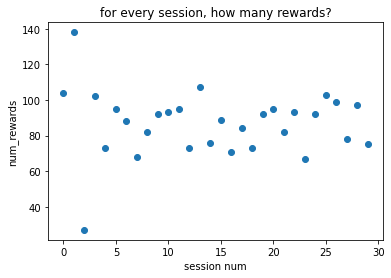

In [40]:
import scipy as scipy
from scipy import optimize
num_rew_per_sesh = []
for ix in range(1,(df2['sess_chng'].max())):
    sesh_data =df2.loc[df2['sess_chng'] == ix]   
    #sesh_data = day_data.loc[day_data['session'] == ix]
    num_rewards = (sesh_data['reward']).sum()
    num_rew_per_sesh.append(num_rewards)
plt.scatter(range(len(num_rew_per_sesh)), num_rew_per_sesh)
plt.title('for every session, how many rewards?')
plt.xlabel('session num')
plt.ylabel('num_rewards')
X = np.array(range(len(num_rew_per_sesh)))
y=np.array(num_rew_per_sesh)
# popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, X, y, p0=[80,-0.5, 120])
#plt.scatter(range(len(lst_prop_at_best_per_sesh)), lst_prop_at_best_per_sesh)
# plt.plot(X, exponential(X, *popt_exponential), 'k--', \
#          label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))


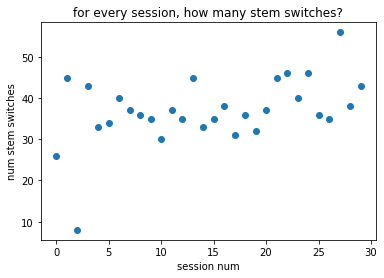

In [41]:

#only_first_cont['stem_switch']
num_switch_per_sesh = []
for ix in range(1,(df2['sess_chng'].max())):
    sesh_data = df2.loc[df2['sess_chng'] == ix]   
    num_switch = (sesh_data['stem_switch']).sum()
    num_switch_per_sesh.append(num_switch)
plt.scatter(range(len(num_switch_per_sesh)), num_switch_per_sesh)
plt.title('for every session, how many stem switches?')
plt.xlabel('session num')
plt.ylabel('num stem switches')
X = np.array(range(len(num_switch_per_sesh)))
y=np.array(num_switch_per_sesh)
# popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, X, y, p0=[0,-0.5, 120])
#plt.scatter(range(len(lst_prop_at_best_per_sesh)), lst_prop_at_best_per_sesh)
# plt.plot(X, exponential(X, *popt_exponential), 'k--', \
#          label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))



Text(0.5, 1.0, 'num rewards vs num stem switches')

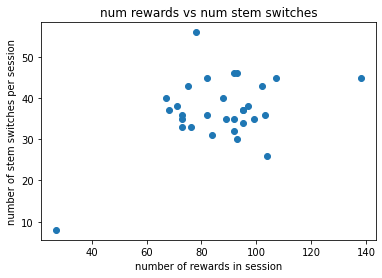

In [42]:
plt.scatter(num_rew_per_sesh, num_switch_per_sesh)
plt.xlabel('number of rewards in session')
plt.ylabel('number of stem switches per session')
plt.title('num rewards vs num stem switches')

Text(0, 0.5, 'leaf visited')

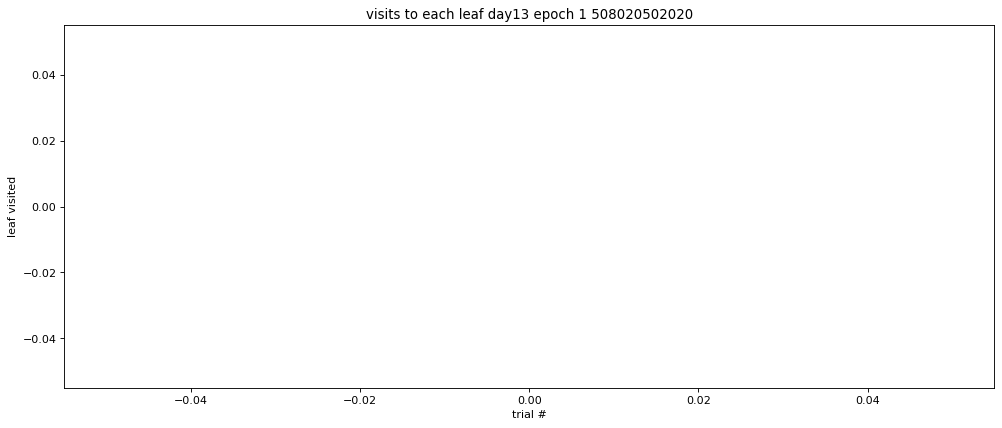

In [43]:
d13_s1 = df2[(df2['day'] == 13) & (df2['session'] == 1) ]
# day5_epoch1
# d5_s1_c1_contingency = day5_epoch1[(day5_epoch1['trial'] == 1)]['contingency']
# d5_s1_c1_contingency
# d5_s1_c1 = day5_epoch1[(day5_epoch1['contingency'] == d5_s1_c1_contingency.iloc[0])]
d13_s1

figure(figsize=(15, 6), dpi=80)
plt.scatter(d13_s1[d13_s1.columns[0]], d13_s1[d13_s1.columns[1]])
plt.title("visits to each leaf day13 epoch 1 508020502020")
plt.xlabel("trial #")
plt.ylabel("leaf visited")



In [ ]:
d13_s1

In [44]:
explore_exploit=[]
for sesh_bout in range(1, df2['sess_chng'].max()):
    sesh_data = df2.loc[df2['sess_chng'] == sesh_bout] 
    stem_switch_ix = sesh_data[sesh_data['stem_switch'] == 1].index
    bout_metadata=[]
    for ix in range(len(stem_switch_ix)):
        if ix< len(stem_switch_ix)-1:
            one_bout= sesh_data.loc[stem_switch_ix[ix]:stem_switch_ix[ix+1]-1]
        else:
            one_bout= sesh_data.loc[stem_switch_ix[ix]:sesh_data.max()[0]]
        num_rew = one_bout['reward'].sum()
        len_bout = len(one_bout)
        stem = one_bout['stem'].iloc[0]
        session = one_bout['session'].iloc[0]
        day = one_bout['day'].iloc[0]
        bout_metadata.append([len_bout,num_rew,stem,session,day])
        cont_bouts_data = pd.DataFrame(bout_metadata, columns=['len_bout', 'num_rew', 'stem','session','day'])
    num_explore = (cont_bouts_data.len_bout<=10).sum()
    num_exploit = (cont_bouts_data.len_bout>10).sum()
    explore_exploit.append ([num_explore,num_exploit])
    #num_explore = bout_metadata<10
explore_exploit

[[9, 17],
 [33, 12],
 [4, 4],
 [31, 12],
 [24, 9],
 [29, 5],
 [36, 4],
 [34, 3],
 [32, 4],
 [29, 6],
 [24, 6],
 [33, 4],
 [29, 6],
 [38, 7],
 [28, 5],
 [30, 5],
 [34, 4],
 [23, 8],
 [30, 6],
 [30, 2],
 [33, 4],
 [40, 5],
 [44, 2],
 [36, 4],
 [45, 1],
 [28, 8],
 [30, 5],
 [55, 1],
 [33, 5],
 [39, 4]]

Text(0.5, 1.0, 'num explore vs exploit bouts- explore blue, bouts less than/ = 10 trials')

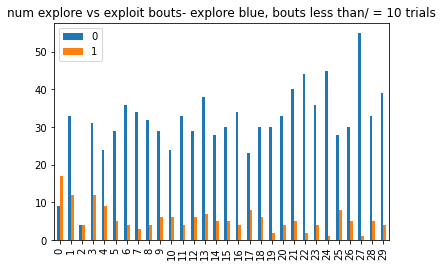

In [45]:
# num_explore = (cont_bouts_data.len_bout<=10).sum()
# num_exploit = (cont_bouts_data.len_bout>10).sum()
pd.DataFrame(explore_exploit).plot.bar()
#plt.vlines() Wnted to add in day but not priority 
plt.title('num explore vs exploit bouts- explore blue, bouts less than/ = 10 trials')

In [46]:
#Should try to find how many time his bout length at a stem is 1
#should start by finding avg length of bout in session

In [47]:
avg_bout_len_lst=[]
for sesh_bout in range(1, df2['sess_chng'].max()):
    sesh_data = df2.loc[df2['sess_chng'] == sesh_bout] 
    stem_switch_ix = sesh_data[sesh_data['stem_switch'] == 1].index
    bout_metadata=[]
    for ix in range(len(stem_switch_ix)):
        if ix< len(stem_switch_ix)-1:
            one_bout= sesh_data.loc[stem_switch_ix[ix]:stem_switch_ix[ix+1]-1]
        else:
            one_bout= sesh_data.loc[stem_switch_ix[ix]:sesh_data.max()[0]]
        num_rew = one_bout['reward'].sum()
        len_bout = len(one_bout)
        stem = one_bout['stem'].iloc[0]
        session = one_bout['session'].iloc[0]
        day = one_bout['day'].iloc[0]
        bout_metadata.append([len_bout,num_rew,stem,session,day])
        cont_bouts_data = pd.DataFrame(bout_metadata, columns=['len_bout', 'num_rew', 'stem','session','day'])
    avg_bout_len=statistics.mean(cont_bouts_data.len_bout)
#     #num_exploit = (cont_bouts_data.len_bout>10).sum()
    avg_bout_len_lst.append([avg_bout_len])

Text(0, 0.5, 'avg bout lenth for session')

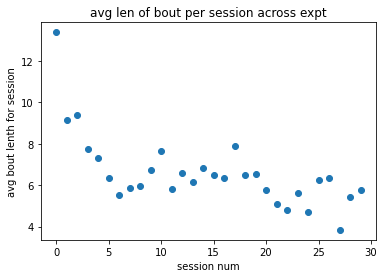

In [48]:
plt.scatter(range(len(avg_bout_len_lst)),avg_bout_len_lst)
plt.title('avg len of bout per session across expt')
plt.xlabel('session num')
plt.ylabel('avg bout lenth for session')


In [ ]:
avg_bout_len

Text(0, 0.5, 'num_rew')

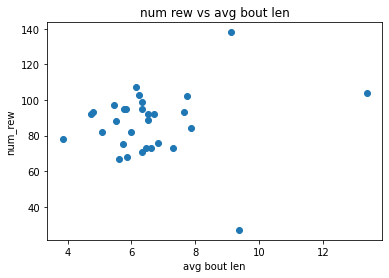

In [49]:
plt.scatter(avg_bout_len_lst,num_rew_per_sesh)
plt.title('num rew vs avg bout len')
plt.xlabel('avg bout len')
plt.ylabel('num_rew')

In [50]:
one_trial_bouts=[]
for sesh_bout in range(1, df2['sess_chng'].max()):
    sesh_data = df2.loc[df2['sess_chng'] == sesh_bout] 
    stem_switch_ix = sesh_data[sesh_data['stem_switch'] == 1].index
    bout_metadata=[]
    for ix in range(len(stem_switch_ix)):
        if ix< len(stem_switch_ix)-1:
            one_bout= sesh_data.loc[stem_switch_ix[ix]:stem_switch_ix[ix+1]-1]
        else:
            one_bout= sesh_data.loc[stem_switch_ix[ix]:sesh_data.max()[0]]
        num_rew = one_bout['reward'].sum()
        len_bout = len(one_bout)
        stem = one_bout['stem'].iloc[0]
        session = one_bout['session'].iloc[0]
        day = one_bout['day'].iloc[0]
        bout_metadata.append([len_bout,num_rew,stem,session,day])
        cont_bouts_data = pd.DataFrame(bout_metadata, columns=['len_bout', 'num_rew', 'stem','session','day'])
    num_bout_1_trial = len(cont_bouts_data[(cont_bouts_data.len_bout)==1])
#     #num_exploit = (cont_bouts_data.len_bout>10).sum()
    one_trial_bouts.append([num_bout_1_trial])

In [51]:
len(cont_bouts_data[(cont_bouts_data.len_bout)==1])

0

Text(0, 0.5, 'number of bouts with only 1 trial')

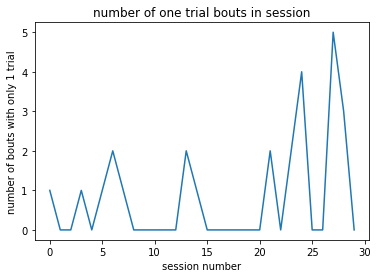

In [52]:
plt.plot(one_trial_bouts)
plt.title('number of one trial bouts in session')
plt.xlabel('session number')
plt.ylabel('number of bouts with only 1 trial')


In [53]:
new_list=[]
for ix in range(len(one_trial_bouts)):
    new_list.append(one_trial_bouts[one_trial_bouts[ix][0]>0])

In [54]:
one_trial_bouts


[[1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [2],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [2],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [2],
 [0],
 [2],
 [4],
 [0],
 [0],
 [5],
 [3],
 [0]]

Text(0, 0.5, 'number of rewards')

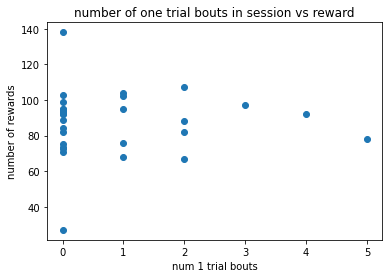

In [55]:
#number of 1 bouts vs num rewards
plt.scatter(one_trial_bouts, num_rew_per_sesh)
plt.title('number of one trial bouts in session vs reward')
plt.xlabel('num 1 trial bouts')
plt.ylabel('number of rewards')

In [ ]:
#maybe should look at prop at second best stem, which should increase over time 

#maybe wonder if a better place to stary is with the nominal probabilities because its more 
#consistent than experienced? 

#see when he visits the worst?

In [56]:
obj = ['day', 'session', 'stem']
df2['rew_rate'] = df2.groupby(obj)[['reward']].apply(lambda x: x.ewm(halflife=5).mean())
df2['rolling_avg_A'] =df2[df2['stem']=='A']['rew_rate']
df2['rolling_avg_B'] =df2[df2['stem']=='B']['rew_rate']
df2['rolling_avg_C'] =df2[df2['stem']=='C']['rew_rate']


cols = ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']
# df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_A'] = 0
# df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_C'] = 0
df2.loc[(df2['trial']==0),'rolling_avg_A'] = 0
df2.loc[(df2['trial']==0),'rolling_avg_B'] = 0
df2.loc[(df2['trial']==0),'rolling_avg_C'] = 0

df2.loc[:,cols] = df2.loc[:,cols].ffill()

equal = (df2['rolling_avg_A'] == df2['rolling_avg_B']) | (df2['rolling_avg_B'] == df2['rolling_avg_C']) | (df2['rolling_avg_A'] == df2['rolling_avg_C'])
df2['worst_stem'] = df2.loc[~equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmin(axis=1)

df2['worst_stem2'] = df2.loc[equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmin(axis=1)
df2
replace_index = df2.loc[(df2['worst_stem2'] =='rolling_avg_A')].index
df2.loc[replace_index,'worst_stem2'] = 'A'
replace_index = df2.loc[(df2['worst_stem2'] =='rolling_avg_B')].index
df2.loc[replace_index,'worst_stem2'] = 'B'
replace_index = df2.loc[(df2['worst_stem2'] =='rolling_avg_C')].index
df2.loc[replace_index,'worst_stem2'] = 'C'

replace_index = df2.loc[(df2['worst_stem'] =='rolling_avg_A')].index
df2.loc[replace_index,'worst_stem'] = 'A'
replace_index = df2.loc[(df2['worst_stem'] =='rolling_avg_B')].index
df2.loc[replace_index,'worst_stem'] = 'B'
replace_index = df2.loc[(df2['worst_stem'] =='rolling_avg_C')].index
df2.loc[replace_index,'worst_stem'] = 'C'

df2['at_worst'] = np.where( df2['stem'] == df2['worst_stem'] , '1', '0')
df2['at_worst2'] = np.where( df2['stem'] == df2['worst_stem2'] , '1', '0')
df2['worst_all'] = df2['at_worst'] +df2['at_worst2']
# del df['at_best']
# del df['at_best2']
Not_at_worst = df2[df2['worst_all']=='00']
at_worst = df2[df2['worst_all']=='01'] 
at_worst2 = df2[df2['worst_all']=='10']

df2.loc[(df2['worst_all'] =='01'),'worst_all']= 1
df2.loc[(df2['worst_all'] =='10'),'worst_all']= 1
df2.loc[(df2['worst_all'] =='00'),'worst_all']= 0

del df2['at_worst']
del df2['at_worst2']

df2


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,day_chng,...,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C,best_stem,best_stem2,best_all,worst_stem,worst_stem2,worst_all
0,0,1,A,1,805020802050,20200303,1,0,1,True,...,1.000000,0.000000,0.000000,0.000000,NaN,A,1,NaN,A,1
1,1,2,A,0,645020802050,20200303,1,1,1,False,...,0.465398,0.465398,0.000000,0.000000,NaN,A,1,NaN,B,0
2,2,1,A,1,644020802050,20200303,1,2,1,False,...,0.668792,0.668792,0.000000,0.000000,NaN,A,1,NaN,B,0
3,3,2,A,1,514020802050,20200303,1,3,1,False,...,0.769519,0.769519,0.000000,0.000000,NaN,A,1,NaN,B,0
4,4,1,A,0,513220802050,20200303,1,4,1,False,...,0.570292,0.570292,0.000000,0.000000,NaN,A,1,NaN,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7309,7309,3,B,0,101006236000,20200313,4,230,11,False,...,0.277509,0.000000,0.277509,0.310183,C,NaN,0,A,NaN,0
7310,7310,4,B,0,101005236000,20200313,4,231,11,False,...,0.241586,0.000000,0.241586,0.310183,C,NaN,0,A,NaN,0
7311,7311,5,C,1,101020906000,20200313,4,232,11,False,...,0.399567,0.000000,0.241586,0.399567,C,NaN,1,A,NaN,0
7312,7312,4,B,1,101020906000,20200313,4,233,11,False,...,0.339762,0.000000,0.339762,0.399567,C,NaN,0,A,NaN,0


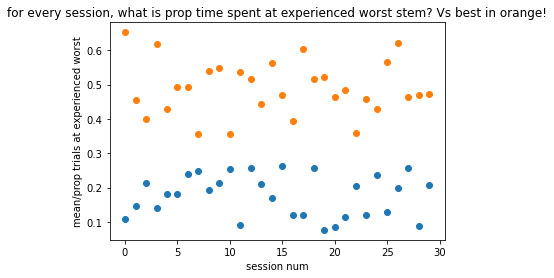

In [57]:
lst_prop_at_worst_per_sesh = []
for ix in range(1,(df2['sess_chng'].max())): #for 1:num sessions 
    sesh_data = df2.loc[df2['sess_chng'] == ix]    #makes new df with only 1st cont of session
    #sesh_data = day_data.loc[day_data['session'] == ix]
    if len(sesh_data)>0:
        prop_trials_at_worst = statistics.mean(sesh_data['worst_all']) #mean num of 1/0 for being at experienced best
    lst_prop_at_worst_per_sesh.append(prop_trials_at_worst)
plt.scatter(range(len(lst_prop_at_worst_per_sesh)), lst_prop_at_worst_per_sesh)
plt.title('for every session, what is prop time spent at experienced worst stem? Vs best in orange!')
plt.xlabel('session num')
plt.ylabel('mean/prop trials at experienced worst')
plt.scatter(range(len(lst_prop_at_best_per_sesh)), lst_prop_at_best_per_sesh)



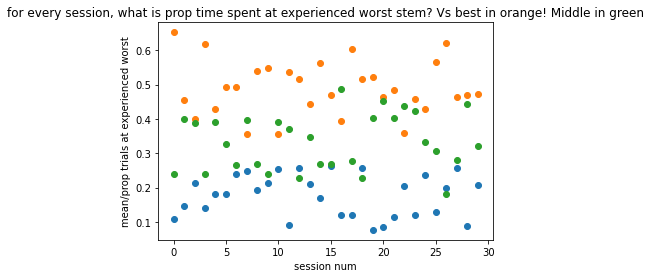

In [58]:
difference = []
zip_object = zip(lst_prop_at_best_per_sesh, lst_prop_at_worst_per_sesh)
for list1_i, list2_i in zip_object:
    difference.append(list1_i+list2_i)
listofones= [1] * len(lst_prop_at_best_per_sesh)
prop_at_middle = []
zip_object = zip(listofones, difference)
for list1_i, list2_i in zip_object:
    prop_at_middle.append(list1_i-list2_i)
prop_at_middle
plt.scatter(range(len(lst_prop_at_worst_per_sesh)), lst_prop_at_worst_per_sesh)
plt.title('for every session, what is prop time spent at experienced worst stem? Vs best in orange! Middle in green')
plt.xlabel('session num')
plt.ylabel('mean/prop trials at experienced worst')
plt.scatter(range(len(lst_prop_at_best_per_sesh)), lst_prop_at_best_per_sesh)
plt.scatter(range(len(prop_at_middle)),prop_at_middle)



IndexError: single positional indexer is out-of-bounds

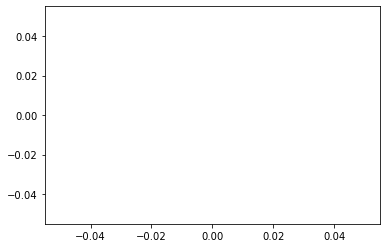

In [59]:
# lst_prop_at_worst_per_sesh = []
#for ix in range(1,(df2['sess_chng'].max())): #for 1:num sessions 
sesh_data = df2.loc[df2['sess_chng'] == 41]    #makes new df with only 1st cont of session
    #sesh_data = day_data.loc[day_data['session'] == ix]
# if len(sesh_data)>0:
#     prop_trials_at_worst = statistics.mean(sesh_data['worst_all']) #mean num of 1/0 for being at experienced best
# lst_prop_at_worst_per_sesh.append(prop_trials_at_worst)
# plt.scatter(range(len(lst_prop_at_worst_per_sesh)), lst_prop_at_worst_per_sesh)
# plt.title('for every session, what is prop time spent at experienced worst stem? Vs best in orange!')
# plt.xlabel('session num')
# plt.ylabel('mean/prop trials at experienced worst')
# plt.scatter(range(len(lst_prop_at_best_per_sesh)), lst_prop_at_best_per_sesh)


sesh_data
plt.scatter(sesh_data.index, sesh_data.stem)
title=(sesh_data['contingency'].head(1)).iloc[0]
plt.title(f'{title}')

In [ ]:
(sesh_data['contingency'].head(1)).iloc[0]


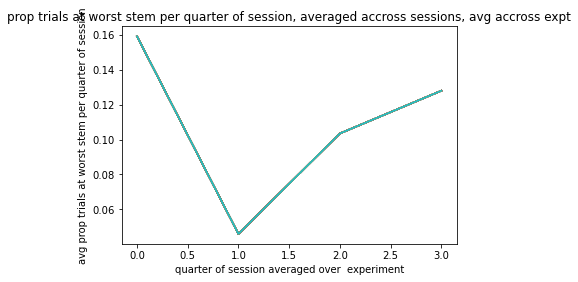

In [60]:
#How much does he go to the worst stem at the end versus the beginning of the session
q1_lst=[]
q2_lst=[]
q3_lst=[]
q4_lst=[]
for ix in range(1,(df2['sess_chng'].max())): #for 1:num sessions 
#sesh_data = df2.loc[df2['sess_chng'] == 50]    #makes new df with only 1st cont of session
    sesh_data = df2.loc[df2['sess_chng'] == ix]
    if len(sesh_data)>0:
        if ix==1:
            q1 = sesh_data.loc[sesh_data.index.min():(len(sesh_data)/4),'worst_all']   
            q2= sesh_data.loc[((len(sesh_data)/4))+1:2*(len(sesh_data)/4),'worst_all'] #mean num of 1/0 for being at experienced best
            q3= sesh_data.loc[2*(len(sesh_data)/4)+1:3*(len(sesh_data)/4),'worst_all'] #mean num of 1/0 for being at experienced best
            q4= sesh_data.loc[3*(len(sesh_data)/4)+1:(4*(len(sesh_data)/4)),'worst_all'] #mean num of 1/0 for being at experienced be
        
        if ix>1:
            q1 = sesh_data.loc[sesh_data.index.min():(sesh_data.index.min()+(len(sesh_data)/4)),'worst_all']   
            q2= sesh_data.loc[(sesh_data.index.min()+(len(sesh_data)/4))+1:(sesh_data.index.min()+2*(len(sesh_data)/4)),'worst_all'] #mean num of 1/0 for being at experienced best
            q3= sesh_data.loc[(sesh_data.index.min()+2*(len(sesh_data)/4))+1:(sesh_data.index.min()+3*(len(sesh_data)/4)),'worst_all'] #mean num of 1/0 for being at experienced best
            q4= sesh_data.loc[(sesh_data.index.min()+3*(len(sesh_data)/4))+1:(sesh_data.index.min()+4*(len(sesh_data)/4)),'worst_all'] #mean num of 1/0 for being at experienced best
    q1_lst.append(q1)
    q2_lst.append(q2)
    q3_lst.append(q3)
    q4_lst.append(q4)

    lst = [statistics.mean(q1_lst[0]),statistics.mean(q2_lst[0]),statistics.mean(q3_lst[0]),statistics.mean(q4_lst[0])]
    plt.plot(lst)
    plt.title('prop trials at worst stem per quarter of session, averaged accross sessions, avg accross expt')
    plt.xlabel('quarter of session averaged over  experiment')
    plt.ylabel('avg prop trials at worst stem per quarter of session')




#     lst = [statistics.mean(q1),statistics.mean(q2),statistics.mean(q3),statistics.mean(q4)]
#     plt.plot(lst)
#     plt.title('avg prop trials at worst stem only in 1st cont per 1/4 of session')
#     plt.xlabel('quarter of expt')
#     plt.ylabel('avg prop trials at worst stem per quarter of session')


#     lst_prop_at_worst_per_sesh.append(prop_trials_at_worst)
# plt.scatter(range(len(lst_prop_at_worst_per_sesh)), lst_prop_at_worst_per_sesh)
# plt.title('for every session, what is prop time spent at experienced worst stem? Vs best in orange!')
# plt.xlabel('session num')
# plt.ylabel('mean/prop trials at experienced worst')
# plt.scatter(range(len(lst_prop_at_best_per_sesh)), lst_prop_at_best_per_sesh)

In [ ]:
lst

In [ ]:
sesh_data = df2.loc[df2['sess_chng'] == 1]

sesh_data


In [ ]:
sesh_data.loc[sesh_data.index.min():(sesh_data.index.min()+(len(sesh_data)/4)),'worst_all']

In [ ]:
sesh_data = df2.loc[df2['sess_chng'] == 50]
visits1 = len(sesh_data[sesh_data['leaf']==1])
visits2 = len(sesh_data[sesh_data['leaf']==2])
visits3 = len(sesh_data[sesh_data['leaf']==3])
visits4 = len(sesh_data[sesh_data['leaf']==4])
visits5 = len(sesh_data[sesh_data['leaf']==5])
visits6 = len(sesh_data[sesh_data['leaf']==6])

lst= [visits1,visits2,visits3,visits4,visits5,visits6]
plt.bar(range(6),lst)
plt.title((sesh_data['contingency'].head(1)).iloc[0])




In [ ]:

figure(figsize=(15, 6), dpi=80)
plt.scatter(d13_s1.iloc[1:100,0], d13_s1.iloc[1:100,1])
plt.title("visits to each leaf day13 epoch 1 508020502020- first 100 trials")
plt.xlabel("trial #")
plt.ylabel("leaf visited")



In [ ]:
d13_s1.iloc[1:100,0]

In [ ]:
d13_s1.loc[d13_s1.stem == "A", "ChooseA"] = "1"
d13_s1.loc[d13_s1.stem == "B", "ChooseB"] = "1"
d13_s1.loc[d13_s1.stem == "C", "ChooseC"] = "1"
d13_s1['ChooseA'] = d13_s1['ChooseA'].fillna(0)
d13_s1['ChooseB'] = d13_s1['ChooseB'].fillna(0)
d13_s1['ChooseC'] = d13_s1['ChooseC'].fillna(0)

In [ ]:
d13_s1


In [ ]:
d13_s1['rollingA'] = d13_s1.ChooseA.rolling(15, min_periods=1).mean()
d13_s1['rollingB'] = d13_s1.ChooseB.rolling(15, min_periods=1).mean()
d13_s1['rollingC'] = d13_s1.ChooseC.rolling(15, min_periods=1).mean()




In [ ]:
d13_s1[1:60]

In [ ]:
# plt.plot(d13_s1.ChooseA)

In [ ]:
# plt.plot(d13_s1.rollingA)
# plt.plot(d13_s1.rollingB)
# plt.plot(d13_s1.rollingC)




In [ ]:
df2.loc[df2.stem == "A", "ChooseA"] = "1"
df2.loc[df2.stem == "B", "ChooseB"] = "1"
df2.loc[df2.stem == "C", "ChooseC"] = "1"
df2['ChooseA'] = df2['ChooseA'].fillna(0)
df2['ChooseB'] = df2['ChooseB'].fillna(0)
df2['ChooseC'] = df2['ChooseC'].fillna(0)
df2['rollingA'] = df2.ChooseA.rolling(15, min_periods=1).mean()
df2['rollingB'] = df2.ChooseB.rolling(15, min_periods=1).mean()
df2['rollingC'] = df2.ChooseC.rolling(15, min_periods=1).mean()



In [ ]:
sesh_data = df2.loc[df2['sess_chng'] ==60]

session = sesh_data['session'].iloc[0]
day = sesh_data['day'].iloc[0]
cont = sesh_data['contingency'].iloc[0]


plt.figure(figsize = (50,20))


plt.plot(sesh_data.rollingA)
plt.plot(sesh_data.rollingB)
plt.plot(sesh_data.rollingC)
# plt.vlines(df[df['new_cont']==True].index,0,1,colors='black',linestyle='--',label='chg contingency')
# plt.vlines(df[df['day_chng']==True].index,0,1,colors='red',linestyle='-',label='new day')
# plt.vlines(df[df['sess_chng'].ne(df['sess_chng'].shift())==True].index,0,1,colors='pink',linestyle=':',label='chg epoch')
plt.legend(['A','B','C'],title='stem',loc='upper left', fontsize = 50)
plt.xlabel('trial #', fontsize = 50)
plt.ylabel('rolling avg, prop trials spent at each stem', fontsize = 50)
plt.title(f'Proportion of trials spent at each stem across session. Day = {day}, Session = {session} Contingency = {cont} ',fontsize = 50)
plt.xticks(fontsize=50)

# plt.plot(df2.rollingB)
# plt.plot(df2.rollingC)



In [ ]:
session = sesh_data['session'].iloc[0]
day = sesh_data['day'].iloc[0]

In [ ]:
session

In [ ]:
day

In [ ]:
#This will plot every single session, prop time at each stem- top show exploratory phase, and exploiting phase. 

# for ix in range(1,len(df2['sess_chng'])):
#     sesh_data = df2.loc[df2['sess_chng'] ==ix]

#     session = sesh_data['session'].iloc[0]
#     day = sesh_data['day'].iloc[0]
#     cont = sesh_data['contingency'].iloc[0]


#     plt.figure(figsize = (50,20))


#     plt.plot(sesh_data.rollingA)
#     plt.plot(sesh_data.rollingB)
#     plt.plot(sesh_data.rollingC)
# # plt.vlines(df[df['new_cont']==True].index,0,1,colors='black',linestyle='--',label='chg contingency')
# # plt.vlines(df[df['day_chng']==True].index,0,1,colors='red',linestyle='-',label='new day')
# # plt.vlines(df[df['sess_chng'].ne(df['sess_chng'].shift())==True].index,0,1,colors='pink',linestyle=':',label='chg epoch')
#     plt.legend(['A','B','C'],title='stem',loc='upper left', fontsize = 50)
#     plt.xlabel('trial #', fontsize = 50)
#     plt.ylabel('rolling avg, prop trials spent at each stem', fontsize = 50)
#     plt.title(f'Proportion of trials spent at each stem across session. Day = {day}, Session = {session} Contingency = {cont} ',fontsize = 50)
#     plt.xticks(fontsize=50)



In [ ]:
ix

In [ ]:
#for every session, what is proportion of time spent at best stem? 
Best_at_trial_num = []
for ix in range((df2['trial'].max())):
    trial_num = df2.loc[df2['trial']==ix]
    Best_at_trial_num.append(trial_num.best_all.mean())
plt.plot(Best_at_trial_num)
plt.title("for every given trial number, is rat at best stem? ")
plt.xlabel('trial num')
plt.ylabel('avg accross experiment- is rat at best stem?')
#for ix in range(1,len(df2['sess_chng'])):
# ix=1
# sesh_data = df2.loc[df2['sess_chng'] ==ix]
# #plt.plot(sesh_data.best_all)
# sesh_data.best_all.rolling(15, min_periods=1).mean()
# df3=pd.DataFrame(sesh_data.best_all.rolling(15, min_periods=1).mean())

# for ix in range(1,df2['sess_chng'].max()):
#     sesh_data = df2.loc[df2['sess_chng'] ==ix]
#     df4.insert(ix, f'{ix}', sesh_data.best_all.rolling(15, min_periods=1).mean())


    #plt.plot(sesh_data.best_all.rolling(15, min_periods=1).mean())

In [ ]:
df3

In [ ]:
df2['sess_chng'].max()